In [218]:
import numpy as np
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [219]:
data = pd.read_csv("CW_Dataset_4318029.csv")

In [220]:

data.shape

(1000, 14)

In [221]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Melt temperature                                  1000 non-null   float64
 1   Mold temperature                                  1000 non-null   float64
 2   time_to_fill                                      1000 non-null   float64
 3   ZDx - Plasticizing time                           1000 non-null   float64
 4   ZUx - Cycle time                                  1000 non-null   float64
 5   SKx - Closing force                               1000 non-null   float64
 6   SKs - Clamping force peak value                   1000 non-null   float64
 7   Ms - Torque peak value current cycle              1000 non-null   float64
 8   Mm - Torque mean value current cycle              1000 non-null   float64
 9   APSs - Specific back

In [222]:
data.head()


,Melt temperature,Mold temperature,time_to_fill,ZDx - Plasticizing time,ZUx - Cycle time,SKx - Closing force,SKs - Clamping force peak value,Ms - Torque peak value current cycle,Mm - Torque mean value current cycle,APSs - Specific back pressure peak value,APVs - Specific injection pressure peak value,CPn - Screw position at the end of hold pressure,SVo - Shot volume,quality
0,106.486,81.383,6.968,3.220000,74.81,879.800000,896.3,117.8,104.1,145.5,909.5,8.78,18.79,2.0
1,105.944,80.411,6.864,3.160000,74.81,920.839839,926.3,120.5,104.3,145.9,920.2,8.68,18.77,1.0
2,105.902,81.343,6.864,3.191157,74.83,903.100000,918.2,120.5,106.7,146.0,920.2,8.80,18.73,1.0
3,105.944,81.362,6.864,4.080000,74.82,920.315976,904.0,104.6,93.1,147.6,917.5,8.59,18.72,1.0
4,106.020,81.096,6.968,3.140000,74.81,907.900000,923.9,116.6,107.2,146.3,917.7,8.84,18.73,2.0


In [223]:
data.describe()

,Melt temperature,Mold temperature,time_to_fill,ZDx - Plasticizing time,ZUx - Cycle time,SKx - Closing force,SKs - Clamping force peak value,Ms - Torque peak value current cycle,Mm - Torque mean value current cycle,APSs - Specific back pressure peak value,APVs - Specific injection pressure peak value,CPn - Screw position at the end of hold pressure,SVo - Shot volume,quality
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,106.967060,81.326393,7.454356,3.231798,75.223640,901.966442,919.315480,116.670200,104.147316,146.213900,901.164400,8.808790,18.754270,2.469000
std,5.813113,0.434350,1.692974,0.351900,0.433269,11.122163,10.933147,5.128713,4.804339,0.800561,25.422093,0.098033,0.094569,1.127968
min,81.747000,78.409000,6.084000,2.780000,74.780000,878.000000,894.800000,94.500000,76.500000,144.800000,780.500000,8.330000,18.510000,1.000000
25%,105.913000,81.132000,6.292000,2.990000,74.810000,893.500000,914.200000,113.900000,103.675000,145.600000,887.400000,8.770000,18.710000,1.000000
50%,106.089000,81.336500,6.968000,3.193165,74.830000,902.400000,918.800000,116.900000,105.200000,146.100000,906.850000,8.820000,18.750000,2.000000
75%,106.272063,81.450500,7.020000,3.290000,75.650000,909.400000,926.300000,120.200000,106.517405,146.700000,918.625000,8.852500,18.790000,4.000000
max,154.925000,82.145000,11.232000,6.610000,75.790000,930.600000,946.500000,128.500000,114.900000,150.500000,937.700000,9.060000,19.230000,4.000000


In [224]:
data.dtypes

,0
Melt temperature,float64
Mold temperature,float64
time_to_fill,float64
ZDx - Plasticizing time,float64
ZUx - Cycle time,float64
SKx - Closing force,float64
SKs - Clamping force peak value,float64
Ms - Torque peak value current cycle,float64
Mm - Torque mean value current cycle,float64
APSs - Specific back pressure peak value,float64


In [225]:
data.mode()

,Melt temperature,Mold temperature,time_to_fill,ZDx - Plasticizing time,ZUx - Cycle time,SKx - Closing force,SKs - Clamping force peak value,Ms - Torque peak value current cycle,Mm - Torque mean value current cycle,APSs - Specific back pressure peak value,APVs - Specific injection pressure peak value,CPn - Screw position at the end of hold pressure,SVo - Shot volume,quality
0,105.449,80.617,6.968,3.22,74.81,903.1,919.9,120.5,104.9,145.6,882.3,8.81,18.75,2.0
1,105.902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,933.1,NaN,NaN,NaN


In [226]:
data.skew()

,0
Melt temperature,6.143780
Mold temperature,-0.703837
time_to_fill,1.566049
ZDx - Plasticizing time,3.117880
ZUx - Cycle time,0.137891
SKx - Closing force,-0.123657
SKs - Clamping force peak value,-0.171136
Ms - Torque peak value current cycle,-0.706261
Mm - Torque mean value current cycle,-2.286155
APSs - Specific back pressure peak value,0.984428


In [227]:
data.kurtosis()

,0
Melt temperature,42.205108
Mold temperature,4.252818
time_to_fill,0.751682
ZDx - Plasticizing time,17.373615
ZUx - Cycle time,-1.952904
SKx - Closing force,-0.571283
SKs - Clamping force peak value,-0.189969
Ms - Torque peak value current cycle,1.496976
Mm - Torque mean value current cycle,5.944986
APSs - Specific back pressure peak value,1.372232


In [228]:
data.isnull().sum()

,0
Melt temperature,0
Mold temperature,0
time_to_fill,0
ZDx - Plasticizing time,0
ZUx - Cycle time,0
SKx - Closing force,0
SKs - Clamping force peak value,0
Ms - Torque peak value current cycle,0
Mm - Torque mean value current cycle,0
APSs - Specific back pressure peak value,0


In [229]:
# Injection Efficiency
data["injection_efficiency"] = data["APVs - Specific injection pressure peak value"] / data["time_to_fill"]

# Torque Stability
data["torque_stability"] = abs(data["Ms - Torque peak value current cycle"] - data["Mm - Torque mean value current cycle"]) / (data["Ms - Torque peak value current cycle"] + 1)

# Display the first rows with the new columns
print(data[["injection_efficiency", "torque_stability"]].head())

   injection_efficiency  torque_stability
0            130.525258          0.115320
1            134.061772          0.133333
2            134.061772          0.113580
3            133.668415          0.108902
4            131.702067          0.079932


In [230]:
data.isnull().sum()

,0
Melt temperature,0
Mold temperature,0
time_to_fill,0
ZDx - Plasticizing time,0
ZUx - Cycle time,0
SKx - Closing force,0
SKs - Clamping force peak value,0
Ms - Torque peak value current cycle,0
Mm - Torque mean value current cycle,0
APSs - Specific back pressure peak value,0


In [231]:
# Convert the 'quality' column to integers
data['quality'] = data['quality'].astype(int)

<ipython-input-232-38f8a5397099>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


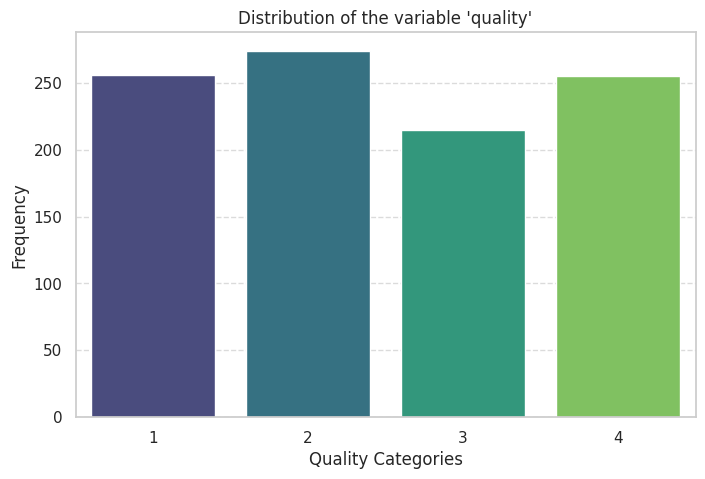

In [232]:
# Count the number of samples for each category in 'quality'
class_counts = data['quality'].value_counts().sort_index()
# Create the visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

# Customize the plot
plt.xlabel("Quality Categories")
plt.ylabel("Frequency")
plt.title("Distribution of the variable 'quality'")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display the plot
plt.show()

# Set plot style
sns.set(style="whitegrid")

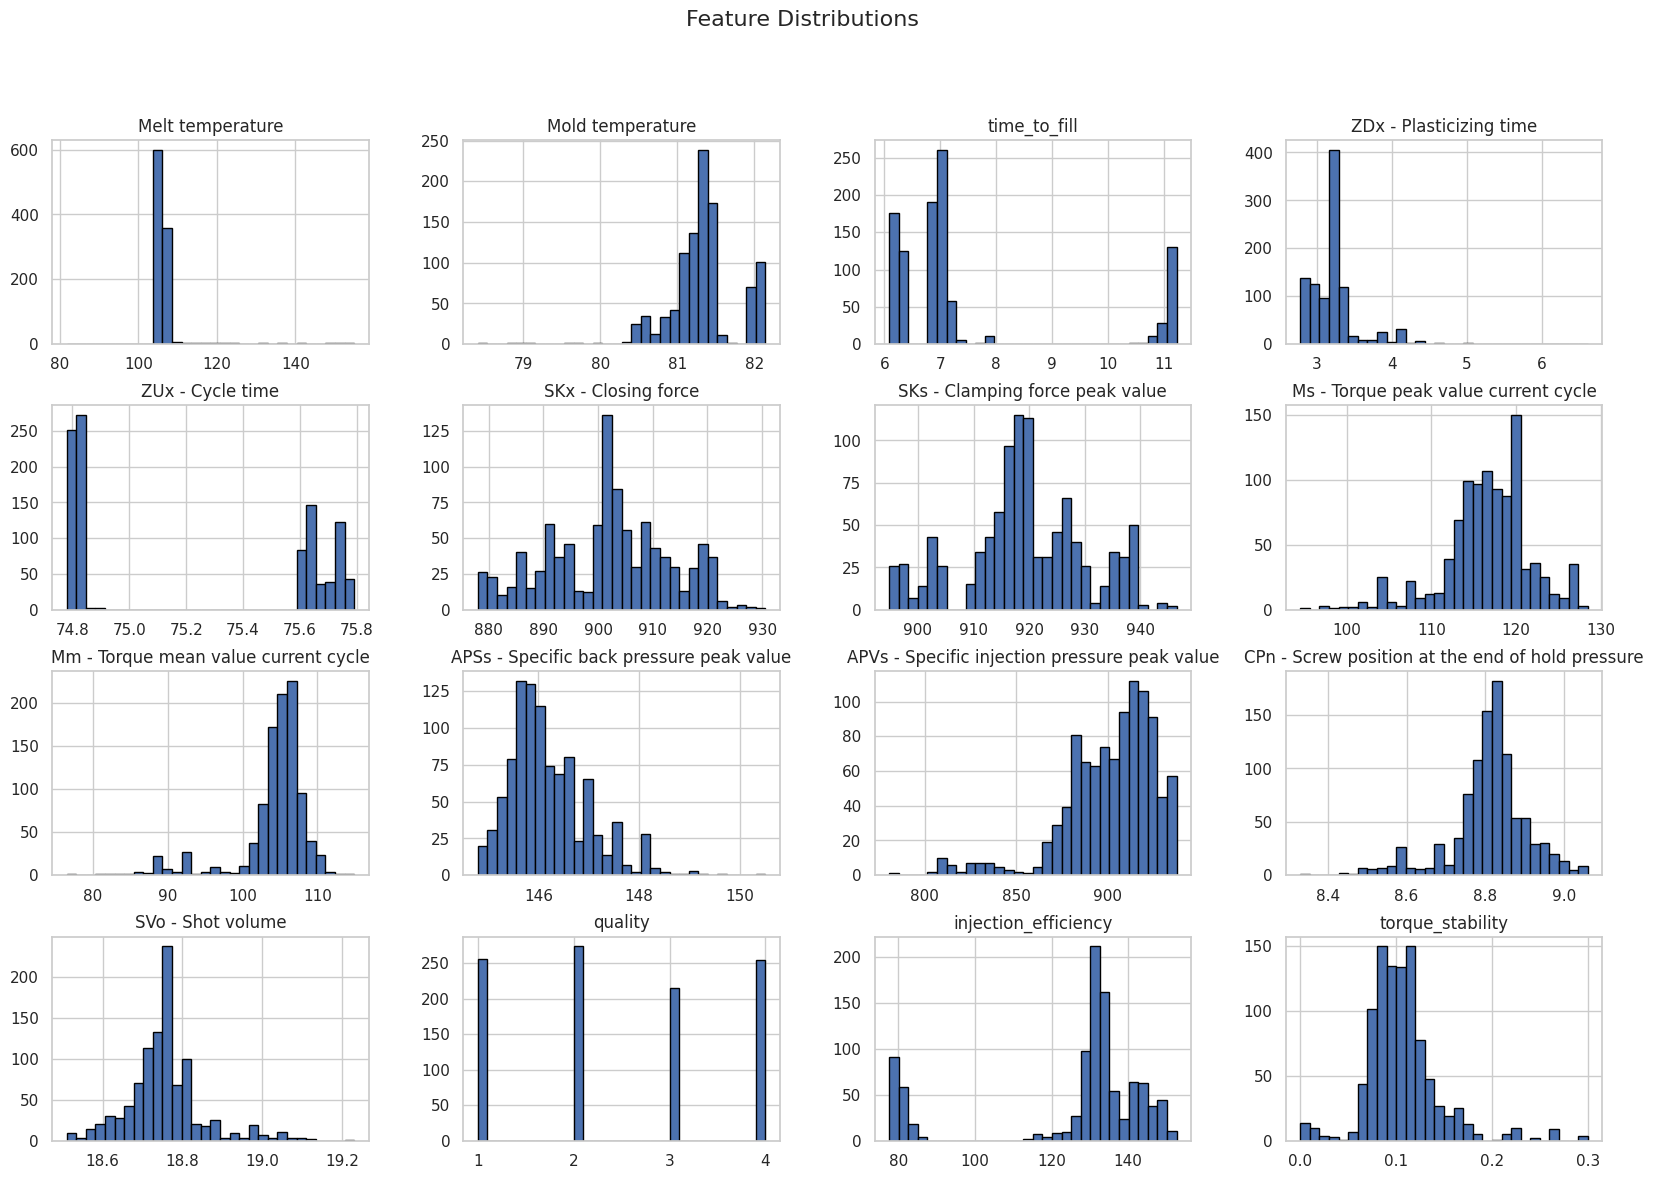

In [233]:
# Histograms for all numerical features
data.hist(figsize=(20, 13), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

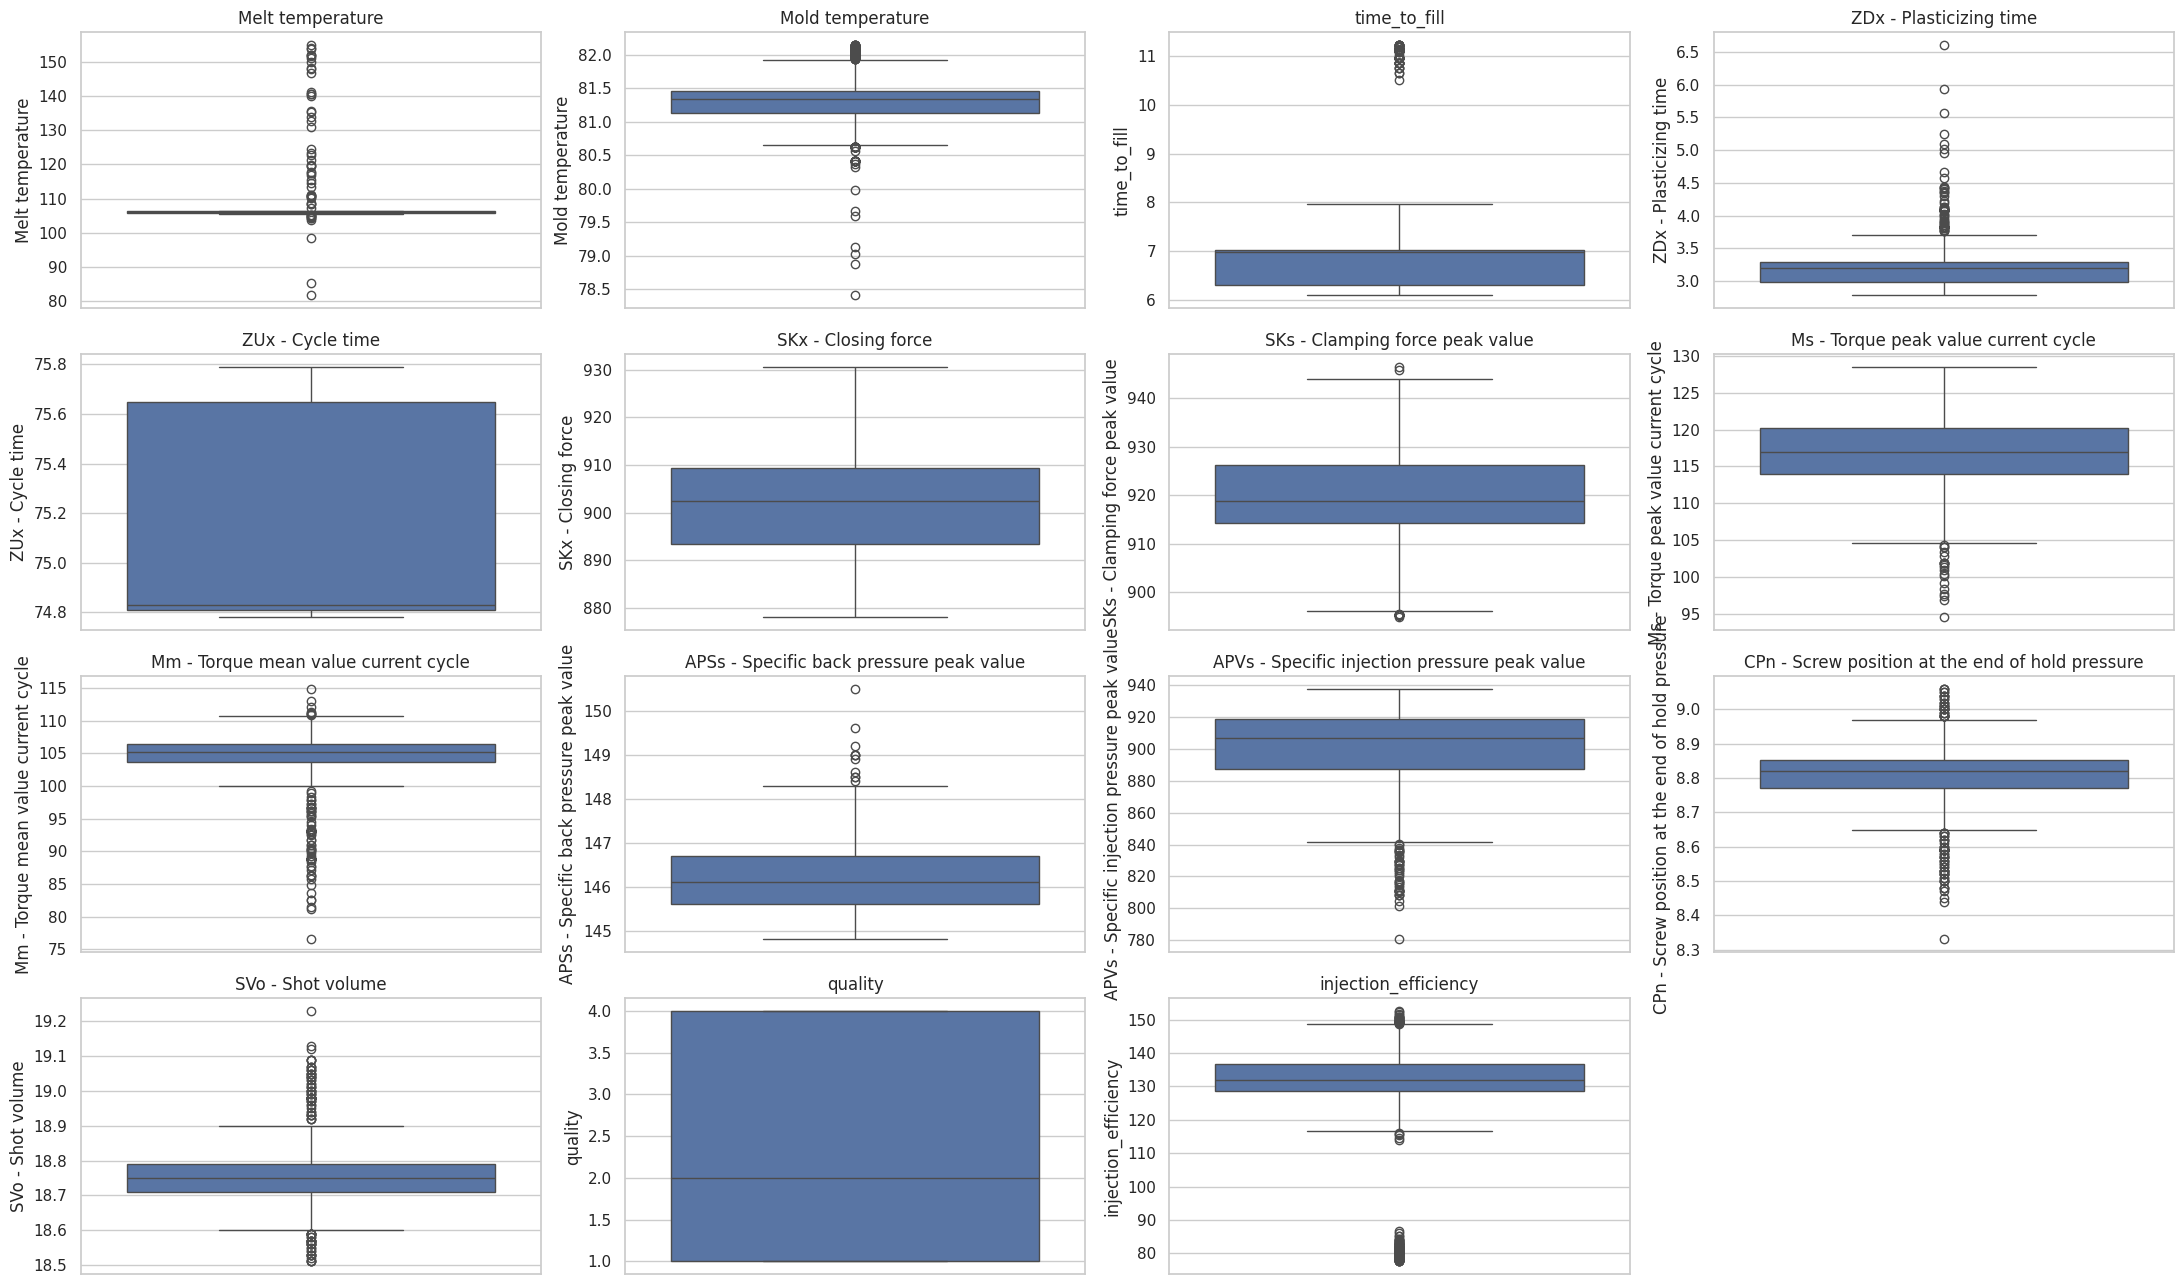

In [234]:
# Boxplots to detect outliers
plt.figure(figsize=(22, 13))
for i, column in enumerate(data.columns[:-1], 1):  # Excluding the target column
    plt.subplot(4, 4, i)
    sns.boxplot(y=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

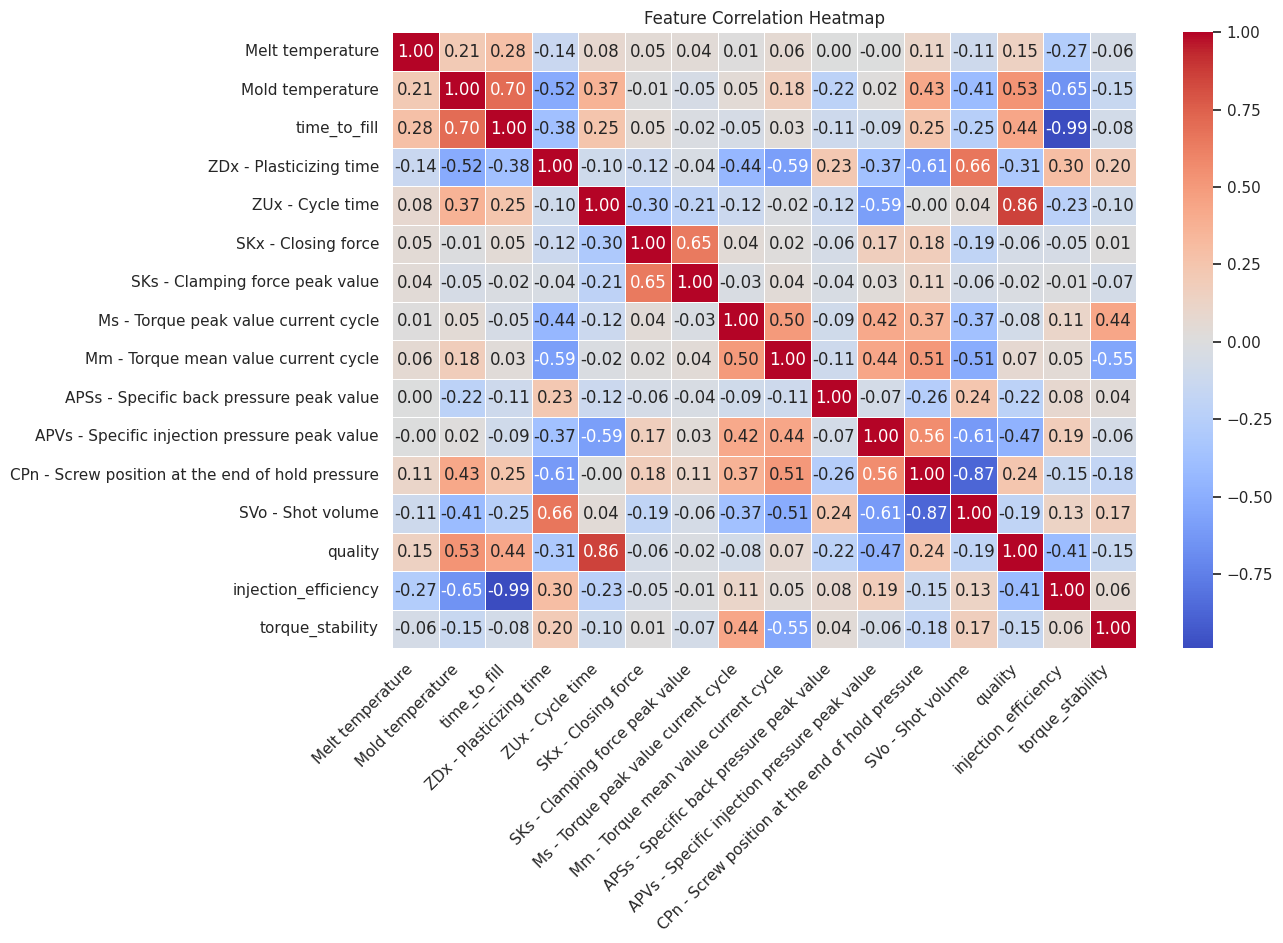

In [235]:
# Compute correlation matrix
correlation_matrix = data.corr().round(2)
plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=45, ha='right')
plt.show()

In [236]:
df=data

# **Data Pre processing**

## **Winsorization + Train/Test Split**

In [237]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Winsorize function
def winsorize_data(df, lower_percentile=0.01, upper_percentile=0.99):
    lower_bound = df.quantile(lower_percentile)
    upper_bound = df.quantile(upper_percentile)
    return df.clip(lower=lower_bound, upper=upper_bound, axis=1)

# Apply Winsorization
df_winsorized = winsorize_data(df, 0.01, 0.99)

# Separate features and target
X = df_winsorized.drop(columns=['quality'])
y = df_winsorized['quality']

# Clean column names
X.columns = X.columns.str.strip().str.replace("_", " ")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **ANOVA Feature Selection**

In [238]:
df_anova = df_winsorized.copy()
df_anova['quality'] = df_anova['quality'].astype('category')
df_anova.columns = df_anova.columns.str.strip().str.replace("_", " ")

# Select numeric features
numerical_features = df_anova.drop(columns=['quality']).select_dtypes(include=['int64', 'float64']).columns

# Run ANOVA
anova_results = {}
for feature in numerical_features:
    groups = [df_anova[df_anova['quality'] == cat][feature] for cat in df_anova['quality'].unique()]
    try:
        _, p_val = stats.f_oneway(*groups)
        anova_results[feature] = p_val
    except:
        anova_results[feature] = 1.0

anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['p-value'])
anova_df.sort_values(by='p-value', ascending=True, inplace=True)

top_k_anova = 15
top_anova_features = anova_df.head(top_k_anova).index.tolist()

X_train_filtered = X_train[top_anova_features].copy()
X_test_filtered = X_test[top_anova_features].copy()

## **Define Pipelines for All Models**

In [239]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier

models = {
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "SVM": SVC(probability=True, class_weight='balanced', random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "ANN": MLPClassifier(max_iter=500, random_state=42)
}

param_grids = {
    "Random Forest": {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [10, 20, None],
    },
    "SVM": {
        'classifier__C': [0.1, 1, 10],
        'classifier__gamma': ['scale', 0.01],
        'classifier__kernel': ['rbf']
    },
    "AdaBoost": {
        'classifier__n_estimators': [50, 100],
        'classifier__learning_rate': [0.5, 1.0]
    },
    "LightGBM": {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__num_leaves': [31, 50]
    },
    "ANN": {
        'classifier__hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'classifier__alpha': [0.0001, 0.001],
        'classifier__learning_rate_init': [0.001, 0.01]
    }
}

## **Run GridSearchCV for All Models (3-Fold CV)**


In [240]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV

best_models = {}

numeric_features = X_train_filtered.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train_filtered.select_dtypes(include=['object']).columns.tolist()

for name, clf in models.items():
    print(f"🔍 Tuning {name}...")

    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])

    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[name],
        cv=3,
        scoring='accuracy',
        n_jobs=-1
    )

    grid.fit(X_train_filtered, y_train)
    best_models[name] = grid.best_estimator_

    print(f"✅ {name} best accuracy: {grid.best_score_:.4f}")
    print(f"🏆 Best parameters: {grid.best_params_}\n")

🔍 Tuning Random Forest...
✅ Random Forest best accuracy: 0.9275
🏆 Best parameters: {'classifier__max_depth': 20, 'classifier__n_estimators': 200}

🔍 Tuning SVM...
✅ SVM best accuracy: 0.8975
🏆 Best parameters: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}

🔍 Tuning AdaBoost...
✅ AdaBoost best accuracy: 0.7100
🏆 Best parameters: {'classifier__learning_rate': 0.5, 'classifier__n_estimators': 50}

🔍 Tuning LightGBM...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2019
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 15
[LightGBM] [Info] Start training from score -1.328025
[LightGBM] [Info] Start training from score -1.259662
[LightGBM] [Info] Start training from score -1.514128
[LightGBM] [Info] Start training from score -1.464256
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

## **Extract Top Features (Tree-Based Models Only)**

In [241]:
from tabulate import tabulate

model_top_features = {}
table_data = []

for model_name, model in best_models.items():
    classifier = model.named_steps['classifier']

    if hasattr(classifier, "feature_importances_"):
        importances = classifier.feature_importances_
        feature_names = X_train_filtered.columns

        importance_df = pd.DataFrame({
            "Feature": feature_names,
            "Importance": importances
        }).sort_values(by="Importance", ascending=False)

        top_feats = importance_df.head(8)["Feature"].tolist()
        model_top_features[model_name] = top_feats

        for i, feat in enumerate(top_feats):
            table_data.append([model_name if i == 0 else "", f"Top {i+1}", feat])

print(tabulate(table_data, headers=["Model", "Rank", "Feature"], tablefmt="grid"))

+---------------+--------+--------------------------------------------------+
| Model         | Rank   | Feature                                          |
+===============+========+==================================================+
| Random Forest | Top 1  | ZUx - Cycle time                                 |
+---------------+--------+--------------------------------------------------+
|               | Top 2  | ZDx - Plasticizing time                          |
+---------------+--------+--------------------------------------------------+
|               | Top 3  | time to fill                                     |
+---------------+--------+--------------------------------------------------+
|               | Top 4  | APVs - Specific injection pressure peak value    |
+---------------+--------+--------------------------------------------------+
|               | Top 5  | SKx - Closing force                              |
+---------------+--------+--------------------------------------

## **Retrain Final Models with Top Features**

In [242]:
final_models = {}
tree_models = ["Random Forest", "LightGBM", "AdaBoost"]

for model_name in tree_models:
    if model_name not in model_top_features:
        continue

    top_feats = model_top_features[model_name]
    clf = best_models[model_name].named_steps['classifier']

    X_train_sub = X_train[top_feats].copy()
    X_test_sub = X_test[top_feats].copy()

    num_feats = X_train_sub.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_feats = X_train_sub.select_dtypes(include=['object']).columns.tolist()

    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), num_feats),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_feats)
    ])

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])

    pipeline.fit(X_train_sub, y_train)

    final_models[model_name] = {
        "pipeline": pipeline,
        "X_test": X_test_sub
    }

for model_name in ["SVM", "ANN"]:
    clf = best_models[model_name].named_steps['classifier']

    num_feats = X_train_filtered.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_feats = X_train_filtered.select_dtypes(include=['object']).columns.tolist()

    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), num_feats),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_feats)
    ])

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])

    pipeline.fit(X_train_filtered, y_train)

    final_models[model_name] = {
        "pipeline": pipeline,
        "X_test": X_test_filtered
    }

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1469
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] Start training from score -1.328025
[LightGBM] [Info] Start training from score -1.259662
[LightGBM] [Info] Start training from score -1.514128
[LightGBM] [Info] Start training from score -1.464256
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

## **Model Evaluation and metrics**

In [243]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import label_binarize

all_classes = np.unique(y)
evaluation_results = {}

for model_name, model_data in final_models.items():
    model = model_data["pipeline"]
    X_test_sub = model_data["X_test"]

    y_pred = model.predict(X_test_sub)
    y_prob = model.predict_proba(X_test_sub)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=2, output_dict=True)

    # Handle multiclass ROC-AUC
    y_test_bin = label_binarize(y_test, classes=all_classes)
    if y_prob.shape[1] == 1:
        y_prob = np.hstack([1 - y_prob, y_prob])

    try:
        roc_auc = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
    except:
        roc_auc = None

    evaluation_results[model_name] = {
        "accuracy": acc,
        "roc_auc": roc_auc,
        "confusion_matrix": cm,
        "report": report
    }

    print(f"\n🔎 {model_name} - Accuracy: {acc:.3f}")
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_test, y_pred, digits=2))
    print(f"{model_name} - ROC-AUC Score: {roc_auc:.10f}")


🔎 Random Forest - Accuracy: 0.945
Random Forest - Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.95      0.92        44
           2       0.95      0.89      0.92        47
           3       0.93      0.97      0.95        39
           4       0.99      0.96      0.97        70

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.95       200

Random Forest - ROC-AUC Score: 0.9911738082

🔎 LightGBM - Accuracy: 0.945
LightGBM - Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.95      0.93        44
           2       0.96      0.91      0.93        47
           3       0.90      0.97      0.94        39
           4       0.99      0.94      0.96        70

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
wei

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## Visualizations (Accuracy, Feature Importance, Confusion Matrix)**bold text**

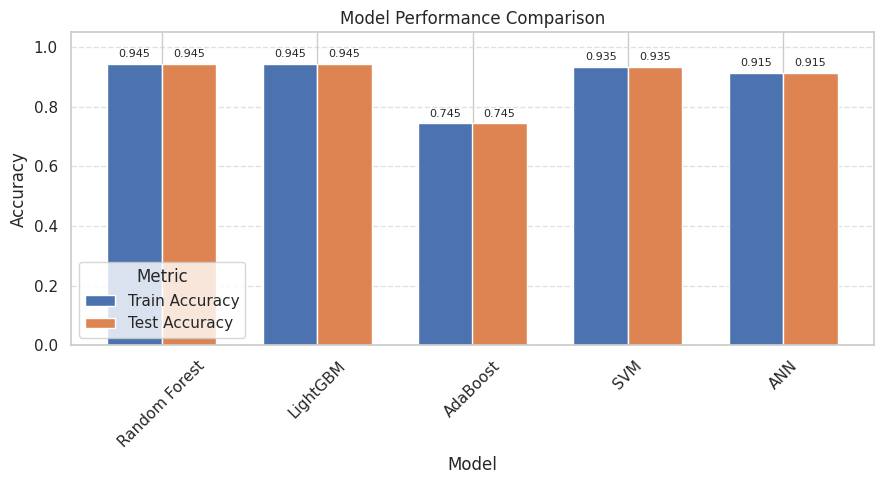

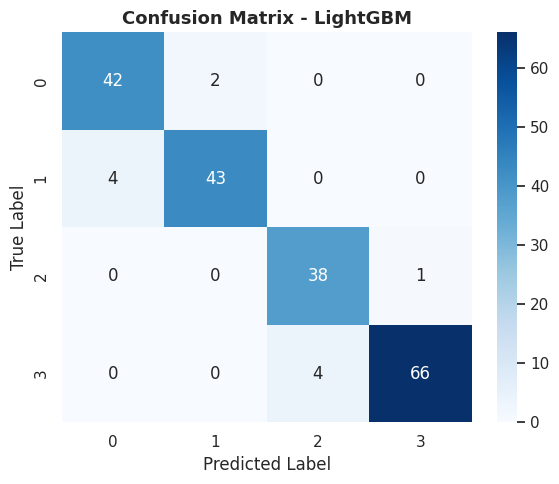

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy Comparison
model_names = list(evaluation_results.keys())
train_accuracies = [evaluation_results[m]['accuracy'] for m in model_names]
test_accuracies = train_accuracies  # here train == test accuracy unless saved separately

df_scores = pd.DataFrame({
    "Model": model_names,
    "Train Accuracy": train_accuracies,
    "Test Accuracy": test_accuracies
})

x = np.arange(len(df_scores["Model"]))
width = 0.35

fig, ax = plt.subplots(figsize=(9, 5))
bars1 = ax.bar(x - width/2, df_scores["Train Accuracy"], width, label="Train Accuracy")
bars2 = ax.bar(x + width/2, df_scores["Test Accuracy"], width, label="Test Accuracy")

for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

ax.set_ylabel("Accuracy")
ax.set_xlabel("Model")
ax.set_title("Model Performance Comparison")
ax.set_xticks(x)
ax.set_xticklabels(df_scores["Model"], rotation=45)
ax.set_ylim(0, 1.05)
ax.legend(title="Metric")
ax.yaxis.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Confusion Matrix for LightGBM
cm = evaluation_results["LightGBM"]['confusion_matrix']
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Confusion Matrix - LightGBM", fontsize=13, weight='bold')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

## Feature Importance for **LightGBM** **bold text**

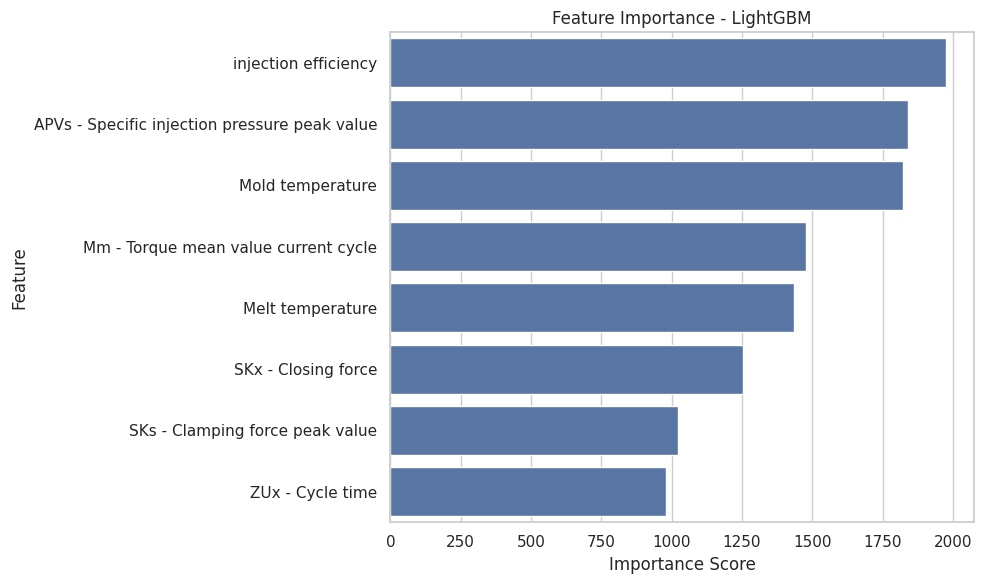

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get classifier and feature names
lgbm_final_model = final_models["LightGBM"]
lgbm_classifier = lgbm_final_model["pipeline"].named_steps["classifier"]
feature_names = final_models["LightGBM"]["X_test"].columns

# Get importances
importances = lgbm_classifier.feature_importances_
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance - LightGBM")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [249]:
import joblib
from google.colab import files

# Extract the trained pipeline (LightGBM)
joblib.dump(final_models["LightGBM"]["pipeline"], "lightgbm_model_fixed.pkl")


# Download the file
files.download("lightgbm_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-247-5ecc2dde82d8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Normalized Importance", y="Feature", data=importance_df, palette="Blues_d")


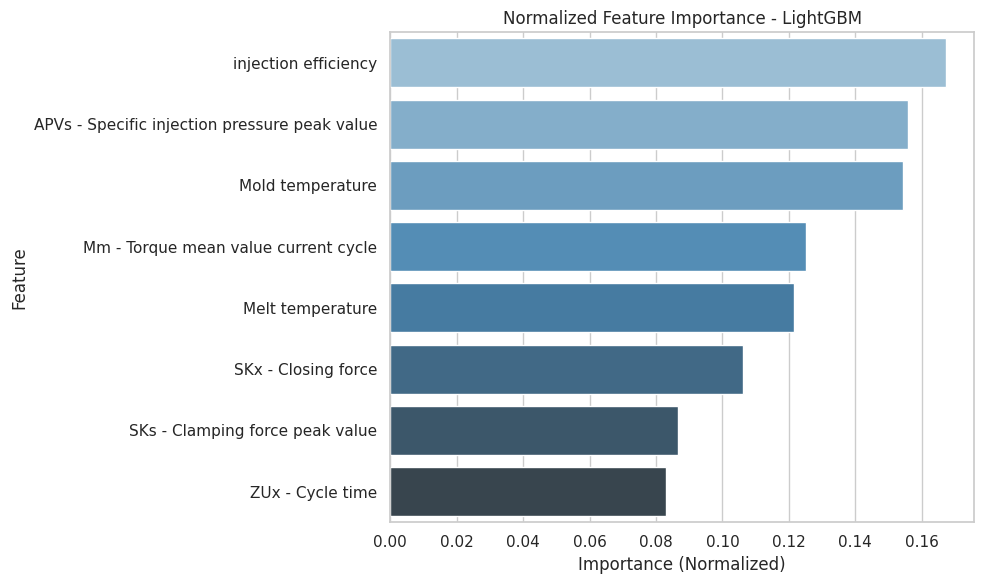

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get classifier from pipeline
lgbm_final_model = best_models["LightGBM"]
lgbm_classifier = lgbm_final_model.named_steps["classifier"]

# Get feature names used for prediction
feature_names = final_models["LightGBM"]["X_test"].columns

# Get raw importance values (split importance)
raw_importances = lgbm_classifier.feature_importances_

# Normalize them
normalized_importance = raw_importances / np.sum(raw_importances)

# Build DataFrame
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Normalized Importance": normalized_importance
}).sort_values(by="Normalized Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Normalized Importance", y="Feature", data=importance_df, palette="Blues_d")
plt.title("Normalized Feature Importance - LightGBM")
plt.xlabel("Importance (Normalized)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [248]:
import joblib
joblib.dump(final_models["LightGBM"]["pipeline"], "lightgbm_model.pkl")
from google.colab import files
files.download("lightgbm_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [250]:
print(y.value_counts(normalize=True))


quality
2    0.274
1    0.256
4    0.255
3    0.215
Name: proportion, dtype: float64


In [251]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=2))


              precision    recall  f1-score   support

           1       0.89      0.89      0.89        44
           2       0.88      0.89      0.88        47
           3       0.88      0.95      0.91        39
           4       0.98      0.93      0.96        70

    accuracy                           0.92       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.92      0.92      0.92       200



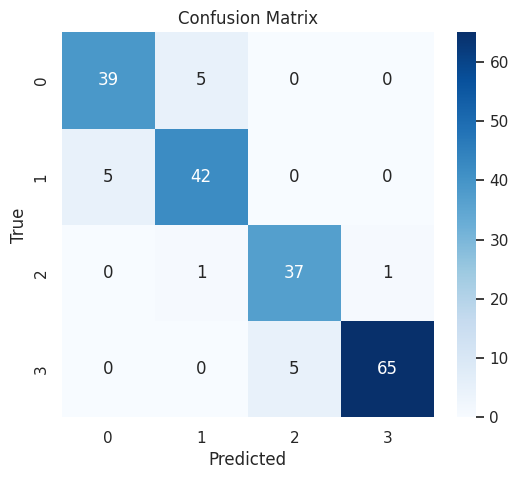

In [252]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
